In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import math, copy

In [69]:
%matplotlib inline

In [20]:
xtr, ytr = load_data()

In [21]:
print(type(xtr))
print(xtr[:5])

<class 'numpy.ndarray'>
[6.1101 5.5277 8.5186 7.0032 5.8598]


In [22]:
print(type(ytr))
print(ytr[:5])

<class 'numpy.ndarray'>
[17.592   9.1302 13.662  11.854   6.8233]


In [23]:
print("X: ", xtr.shape)
print("Y: ", ytr.shape)

X:  (97,)
Y:  (97,)


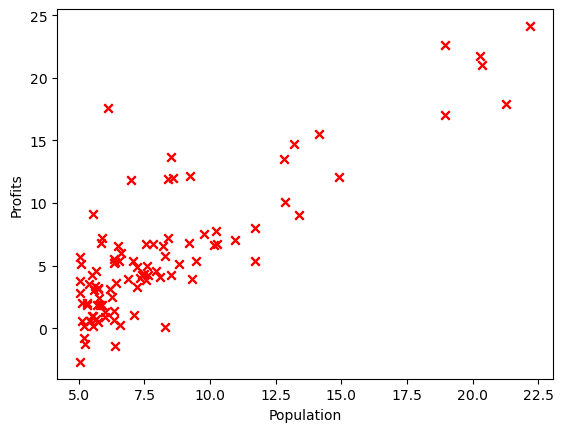

In [27]:
plt.scatter(xtr,ytr, marker="x", c="r")
plt.xlabel("Population")
plt.ylabel("Profits")
plt.show()

In [60]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        fwx = w*x[i] + b
        cost = (fwx - y[i])**2
        total_cost += cost
    total_cost /= 2*m
    return total_cost

In [61]:
compute_cost(xtr, ytr, 2, 1)

np.float64(75.20338497891959)

In [62]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        fwx = w*x[i] + b
        dw = (fwx - y[i])*x[i]
        db = fwx - y[i]
        dj_dw += dw
        dj_db += db
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [63]:
compute_gradient(xtr, ytr, 0.2, 0.2)

(np.float64(-47.41610118114435), np.float64(-4.007175051546391))

In [64]:
def gradient_decsent(x, y, w_in, b_in, alpha, iters, cost = compute_cost, grad = compute_gradient):
    j_history = []
    p_history = []

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(iters):
        dw, db = grad(x, y, w, b)
        w -= alpha*dw
        b -= alpha*db

        if i < 100000:
            j_history.append(cost(x, y, w, b))
            p_history.append([w, b])

        if i% math.ceil(iters/10)==0:
            print(f'Iteration: {i}, Cost: {float(j_history[-1]):0.2f}')

    return w, b, j_history, p_history

In [65]:
w, b, jh, ph = gradient_decsent(xtr, ytr, 0, 0, 0.01, 1500)
print(f"Final W = {w} and Final B = {b}")

Iteration: 0, Cost: 6.74
Iteration: 150, Cost: 5.31
Iteration: 300, Cost: 4.96
Iteration: 450, Cost: 4.76
Iteration: 600, Cost: 4.64
Iteration: 750, Cost: 4.57
Iteration: 900, Cost: 4.53
Iteration: 1050, Cost: 4.51
Iteration: 1200, Cost: 4.50
Iteration: 1350, Cost: 4.49
Final W = 1.166362350335582 and Final B = -3.63029143940436


In [66]:
m = xtr.shape[0]
y_hat = np.zeros(m)
for i in range(m):
    y_hat[i] = w * xtr[i] + b

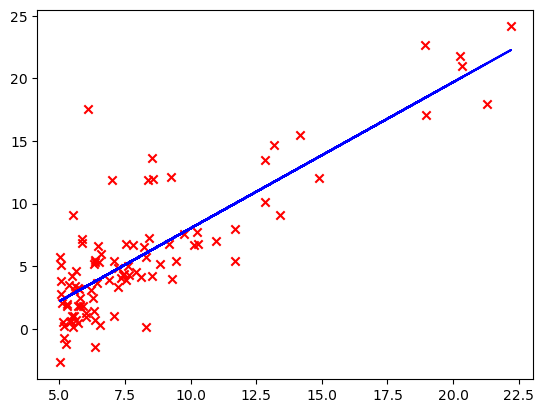

In [72]:
plt.plot(xtr, y_hat, c="b")
plt.scatter(xtr, ytr, marker="x", c="r")
plt.show()